#Sesión 9 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aprenderás a generar un modelo de regresión con un dataset y el uso de las librerías de Python desde fuentes de datos que se encuentran en la web.


**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
El siguiente dataset tiene información sobre el clima.

Con estos datos podremos hacer una predicción.


Los features que el dataset incluye son los siguientes: 

* MinTemp
* MaxTemp
* Rainfall
* Evaporation
* Sunshine
* WindGustDir
* WindGustSpeed
* WindDir9am
* WindDir3pm
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm
* Pressure9am
* Pressure3pm
* Cloud9am
* Cloud3pm
* Temp9am
* Temp3pm
* RainToday
* RISK_MM
* RainTomorrow


In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split,RepeatedKFold
# model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 


Populating the interactive namespace from numpy and matplotlib


In [4]:
#Si el recurso lo tienes en drive, puedes montar tu google Drive y hacer referencia a la ruta del dataset en el siguiente código

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Diplomado DS Duoc/Sesión 9 - Clima"  #Esta es la ruta
!ls /content/drive/My\ Drive/Diplomado\ DS\ Duoc/Sesión\ 9\ -\ Clima

df = pd.read_csv(path+"/weather.csv", sep=",")

Mounted at /content/drive
'Sesión 9 - Predicción clima.ipynb'   weather.csv


In [ ]:
#Si el dataset lo tienes local con el notebook, puedes establecer el path o la ruta de estos

#df = pd.read_csv(
#   "/content/weather.csv",
#    sep=";"
#)
#df = df[:-1]

In [5]:
# Análisis inicial 
print(df.head())

# información
print(df.info())

# descripción
print(df.describe())

# cantidad de filas/columnas
print(df.shape)

# Columnas
print(df.columns)

#Eliminamos features no significativas
df.drop(['WindDir9am', 'WindDir3pm',
         'WindSpeed9am', 'WindSpeed3pm',
         'Humidity9am', 'Humidity3pm',
         'Pressure9am', 'Pressure3pm',
         'Cloud9am', 'Cloud3pm',
         'Temp9am','Temp3pm'],axis=1,inplace=True)

   MinTemp  MaxTemp  Rainfall  ...  RainToday  RISK_MM RainTomorrow
0      8.0     24.3       0.0  ...         No      3.6          Yes
1     14.0     26.9       3.6  ...        Yes      3.6          Yes
2     13.7     23.4       3.6  ...        Yes     39.8          Yes
3     13.3     15.5      39.8  ...        Yes      2.8          Yes
4      7.6     16.1       2.8  ...        Yes      0.0           No

[5 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 

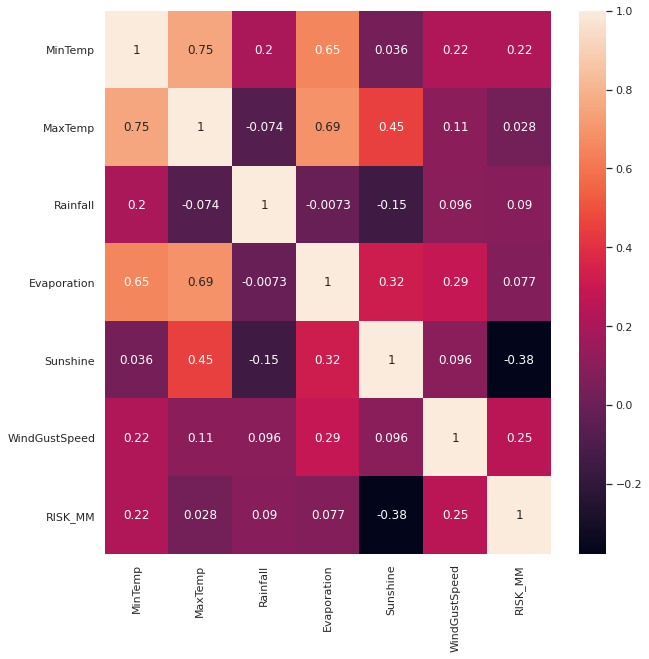

In [6]:
sns.set(
    rc={
        "figure.figsize":(10,10)
    }
)
sns.heatmap(
    df.corr(),
    annot=True
)

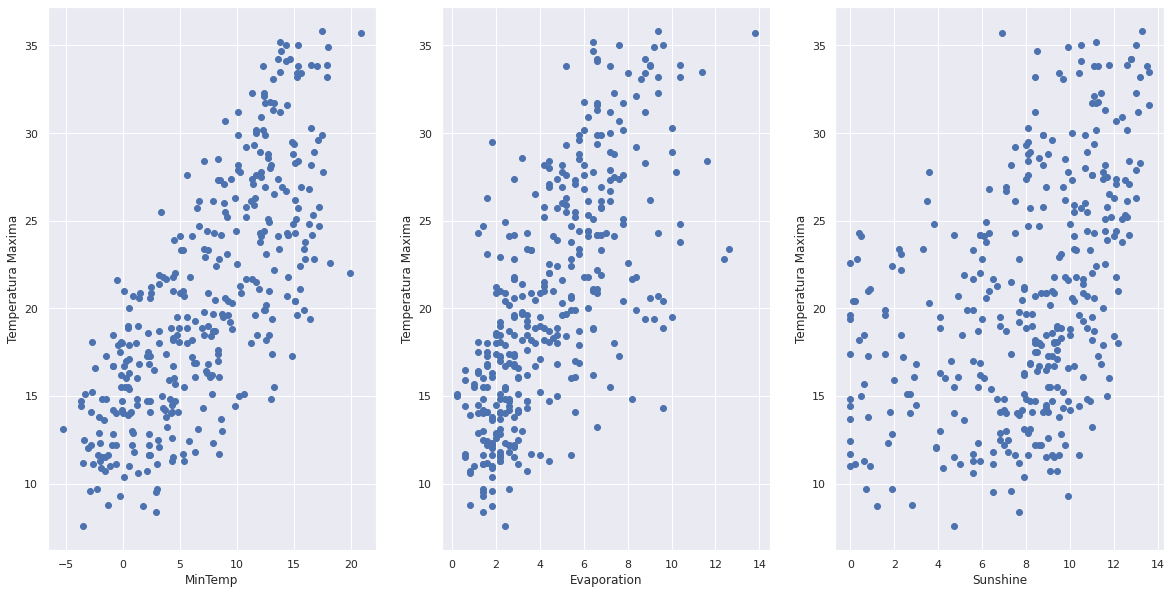

In [7]:
caracteristicas = ["MinTemp","Evaporation","Sunshine"]
for col in caracteristicas:
  df[col].fillna(df[col].mean(),inplace=True)
maxTemp = df["MaxTemp"]
plt.figure(
    figsize=(20,10)
)
for pivote,col in enumerate(caracteristicas):
  plt.subplot(
      1,
      len(caracteristicas),
      pivote+1
  )
  plt.scatter(
      df[col],
      maxTemp
  )
  plt.xlabel(col)
  plt.ylabel("Temperatura Maxima")
plt.show()

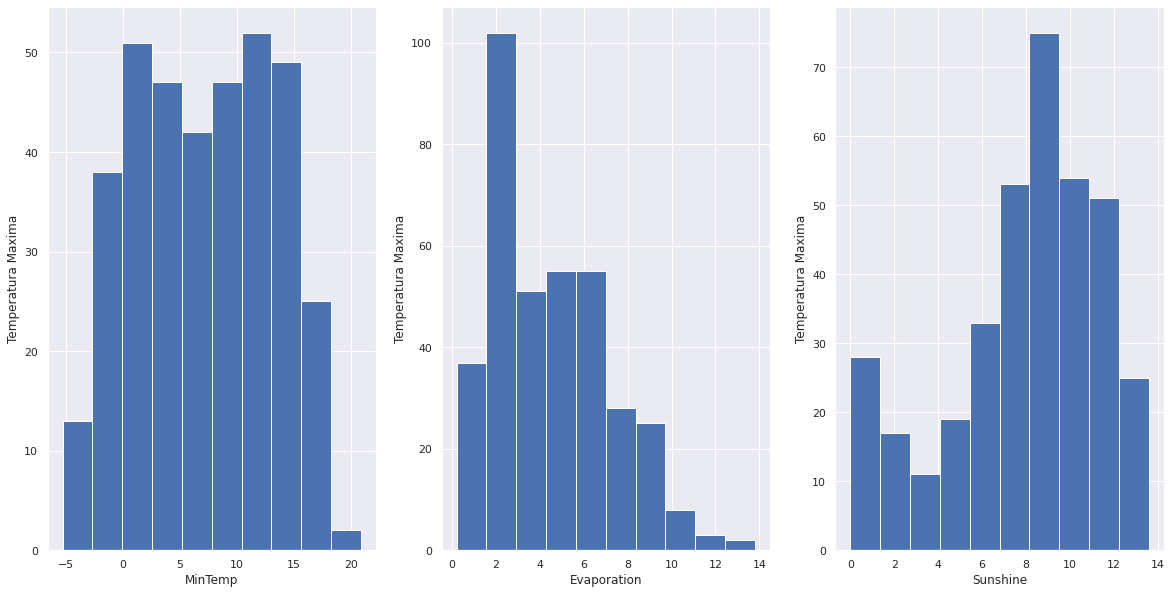

In [8]:
plt.figure(
    figsize=(20,10)
)
for pivote,col in enumerate(caracteristicas):
  plt.subplot(
      1,
      len(caracteristicas),
      pivote+1
  )
  plt.hist(
      df[col],
      bins=10
  )
  plt.xlabel(col)
  plt.ylabel("Temperatura Maxima")
plt.show()

In [9]:
# Separando la inforamción para entrenamiento
datos_entre = df[caracteristicas]
eti_temp = maxTemp
datos_entrenamiento,datos_prueba,eti_entrenamiento,eti_prueba = train_test_split(
    datos_entre,
    eti_temp,
    test_size=0.25,
    random_state=1
)
print("Los datos para entrenamiento son : ",datos_entrenamiento.shape)
print("Los datos para prueba son : ",datos_prueba.shape)
print("Los eti para entrenamiento son : ",eti_entrenamiento.shape)
print("Los eti para prueba son : ",eti_prueba.shape)

Los datos para entrenamiento son :  (274, 3)
Los datos para prueba son :  (92, 3)
Los eti para entrenamiento son :  (274,)
Los eti para prueba son :  (92,)


In [10]:
# Entrenamieto de los modelos
# DecisionTreeRegressor
# LinearRegression
# KNeighborsRegressor
# RandomForestRegressor 
modelos = []
modelos.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
modelos.append(("LinearRegression",LinearRegression()))
modelos.append(("KNeighborsRegressor",KNeighborsRegressor()))
modelos.append(("RandomForestRegressor",RandomForestRegressor())) 
for nombre,modelo in modelos:
  modelo.fit(datos_entrenamiento,eti_entrenamiento)
  resultado = modelo.score(datos_prueba,eti_prueba)
  print("El modelo {mol} tiene un rendimiento del {ren:.2f}%".format(
      mol=nombre,
      ren=resultado*100
  ))

El modelo DecisionTreeRegressor tiene un rendimiento del 64.64%
El modelo LinearRegression tiene un rendimiento del 78.93%
El modelo KNeighborsRegressor tiene un rendimiento del 75.52%
El modelo RandomForestRegressor tiene un rendimiento del 76.37%


In [11]:
ndf = pd.DataFrame(
    {
        "original":eti_prueba.values,
    }
)
for nombre, modelo in modelos:
  ndf[nombre] = modelo.predict(datos_prueba)


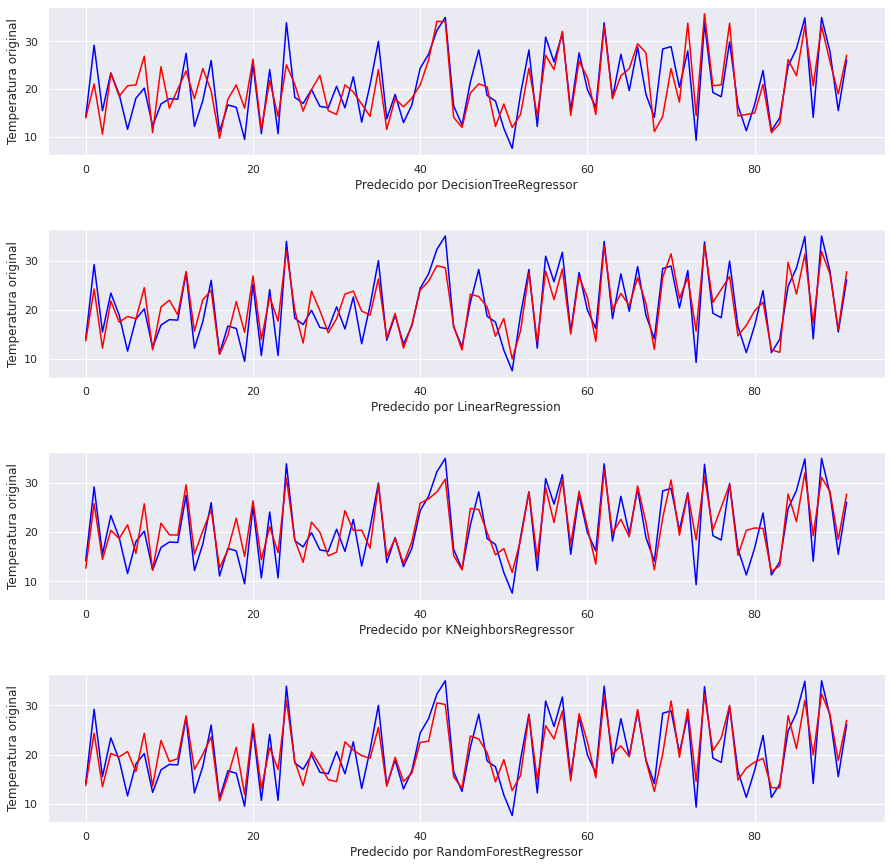

In [12]:
plt.figure(
    figsize=(15,15)
)
for pivote,modelo in enumerate(modelos):
  plt.subplot(
      len(modelos),
      1,
      pivote+1
  )
  plt.subplots_adjust(
      hspace=0.5,
      wspace=1
  )
  plt.plot(
      ndf["original"],
      color="blue"
  )
  plt.plot(
      ndf[modelo[0]],
      color="red"
  )
  plt.ylabel("Temperatura original")
  plt.xlabel("Predecido por {}".format(modelo[0]))
